In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
df = pd.read_csv('perceptron.csv')

In [5]:
data = np.genfromtxt("perceptron.csv", delimiter=",")
data = data [1:]
data


array([[ 1.02850287,  0.97321756, -1.        ],
       [ 0.2525051 ,  0.95587152, -1.        ],
       [ 1.50808537,  0.672058  , -1.        ],
       ...,
       [-0.4651142 , -1.29082989,  1.        ],
       [ 1.52205548,  0.9480073 , -1.        ],
       [ 0.83411829,  0.92671017, -1.        ]])

In [6]:
x_train, x_test= train_test_split(data, test_size=0.25, random_state=7)

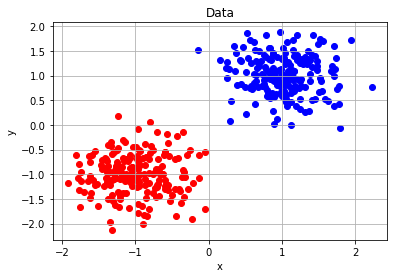

In [7]:
plt.grid()
for i in range(len(data)) :
    point = data[i]

    if point[2] == -1 :
        color = "blue"

    elif point[2] == 1 :
        color = "red"
        
    plt.scatter(point[0], point[1], c=color)
    plt.title('Data')
    plt.xlabel('x')
    plt.ylabel('y')


In [8]:
#activation function
def sign(x,theta):
    if (x > theta):
        return 1
    elif (x < -theta):
        return -1
    else:
        return 0

In [21]:
learning_rate = 0.01
#learning_rate = 0.0001

# generating the weights & the bias
w1 = 0
w2 = 0
b = 0
th = 100

for epoch in range(1000) :

    for i in range(len(x_train)) :
        x = x_train[i]
        net = x[0] * w1 + x[1] * w2 + b

        y = sign(net,th)

        target = x[2]
    
        # Updating the weights & the bias
        if target != y :
            
            w1 = w1 + learning_rate * (target) * x[0]
            w2 = w2 + learning_rate * (target) * x[1]
            b = b + learning_rate * (target)


In [22]:
print(w1,w2,b)

-120.59718441540234 -109.9895695159157 8.109999999999872


In [23]:
def guess(x1, x2,theta) :
        
    z = x1 * w1 + x2 * w2 + b
    out = sign(z,theta)
    if out == -1 :
        return -1
    elif out == 1 :
        return 1

In [24]:
cnt =0
for i in range(len(x_test)):
    xx = x_test[i] 
    g = guess(xx[0], xx[1],th)
    if(xx[2] == g):
        cnt+=1

In [25]:
print(cnt/len(x_test))

0.97


Text(0, 0.5, 'y')

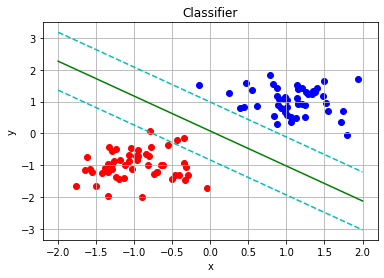

In [26]:
plt.grid()
for i in range(len(x_test)) :
    point = x_test[i]
#     print(point)
    if point[2] == -1 :
        color = "blue"

    elif point[2] == 1 :
        color = "red"
        
    plt.scatter(point[0],point[1], c=color)

x3 = np.linspace(-2,2,100)
y3 = ((-w1 * x3) - b) / w2
y_m1 = ((-w1 * x3) - (b+th)) / w2
y_m2= ((-w1 * x3) - (b-th)) / w2
plt.title('Classifier')
plt.plot(x3,y3,c = 'green')
plt.plot(x3,y_m1,'c--')
plt.plot(x3,y_m2,'c--')
plt.xlabel('x')
plt.ylabel('y')